/home/yago/miniforge3/envs/latinmag/lib/python3.9/site-packages/magali/_visualization.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = mpatches.Rectangle(


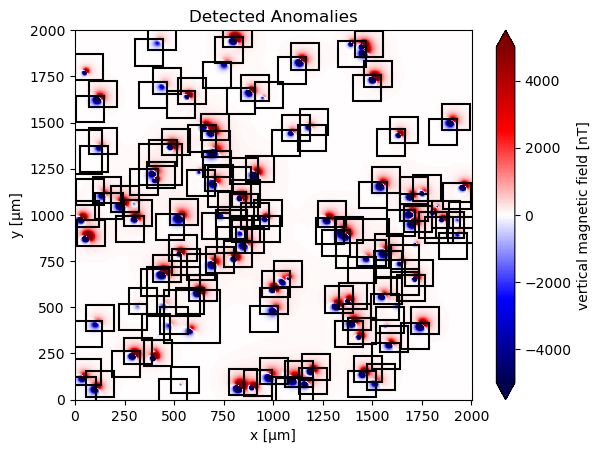

In [23]:
import numpy as np
import verde as vd
import magali as mg
import harmonica as hm
import matplotlib.pyplot as plt

SEED = 5
rng = np.random.default_rng(SEED)

sensor_sample_distance = 5.0  # µm
region = [0, 2000, 0, 2000]  # µm
spacing = 2  # µm

true_inclination = 30  # degrees
true_declination = 40  # degrees
true_dispersion_angle = 5  # degrees
size = 100  # number of random dipoles

directions_inclination, directions_declination = mg.random_directions(
    true_inclination,
    true_declination,
    true_dispersion_angle,
    size=size,
    random_state= SEED,
)

dipoles_amplitude = abs(rng.normal(0, 100, size)) * 1.0e-14

dipole_coordinates = (
    rng.integers(30, 1970, size), # x
    rng.integers(30, 1970, size), # y
    rng.integers(-20, -1, size), # z
)

dipole_moments = hm.magnetic_angles_to_vec(
    inclination=directions_inclination,
    declination=directions_declination,
    intensity=dipoles_amplitude,
)

data = mg.dipole_bz_grid(
    region, spacing, sensor_sample_distance,
    dipole_coordinates, dipole_moments
)

# noise_std_dev = 100  # nT
# noise = rng.normal(loc=0, scale=noise_std_dev, size=data.shape)
# data.values += noise

windows = mg.detect_anomalies(
    data,
    size_range = [25, 50], #µm
    detection_threshold = 0.8,
    border_exclusion= 2,
)

fig, ax = plt.subplots()
data.plot.pcolormesh(ax=ax, cmap="seismic", vmin=-5000, vmax=5000)
mg.plot_bounding_boxes(windows, ax=ax, color="black", linewidth=1.5)


ax.set_title("Detected Anomalies")
plt.show()
